# КМ-3.
### Задание
* Рассмотрите схему, состоящую из источника ЭДС (E), резистора и нелинейного элемента NE, заданного вольт-амперной характеристикой (ВАХ): 𝑖$_{𝑁𝐸}$=𝑢$^5$$_{𝑁𝐸}$, где 𝑖$_{𝑁𝐸}$, 𝑢$_{𝑁𝐸}$ – ток и напряжение на нелинейном элементе. Резистор и нелинейный элемент включены параллельно друг другу. В свою очередь они подключены к источнику ЭДС. 𝐸(𝑡)=(𝑡−1)$^3$. Напишите функцию для вычисления токов на резисторе и нелинейном элементе.

* Постройте зависимости токов на резисторе и нелинейном элементе при R=1 Ом и R=0.2 Ом. Постройте их графики в зависимости от времени от 0 до 2.

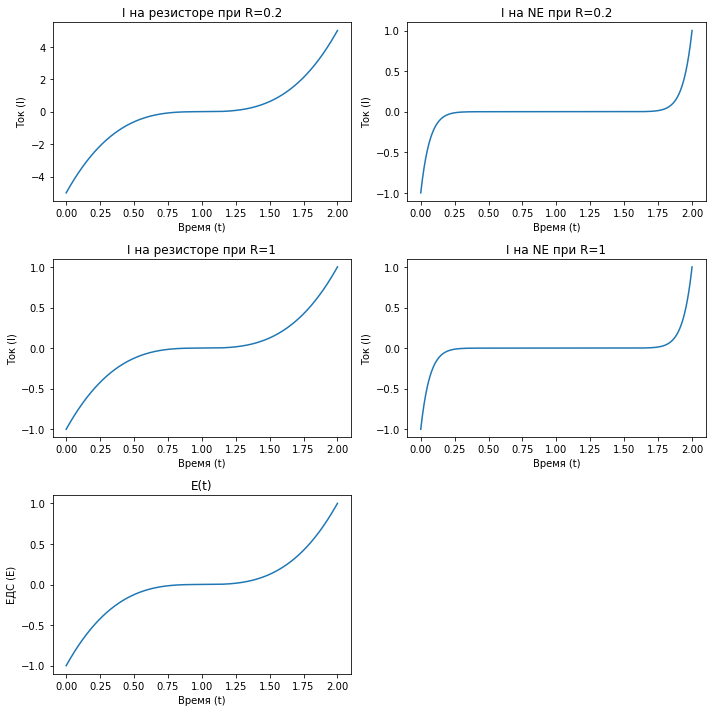

In [5]:
from scipy.optimize import fsolve
from numpy import linspace
import matplotlib.pyplot as plt


def VAh(u):
    return u**5


def shema(I, u, r):
    return I - u/((r*u/VAh(u))/(r+u/VAh(u)))


def tok(t, r):
    u = (t-1)**3
    I = fsolve(shema, 0, args=(u, r))[0]
    return u/r, I-u/r


def draw():
    x = [t for t in list(linspace(0, 2, 1000))] #Время
    y1 = [tok(t, 0.2) for t in x]
    y1_1 = [i[0] for i in y1] #Ток на резисторе при R=0.2
    y1_2 = [i[1] for i in y1] #Ток на NE при R=0.2
    y2 = [tok(t, 1) for t in x]
    y2_1 = [i[0] for i in y2] #Ток на резисторе при R=0.1
    y2_2 = [i[1] for i in y2] #Ток на NE при R=1
    y3 = [(t-1)**3 for t in x] #ЭДС при t от 0 до 2

    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(3, 2, 1)
    ax1.set(title='I на резисторе при R=0.2')
    ax2 = fig.add_subplot(3, 2, 2)
    ax2.set(title='I на NE при R=0.2')
    ax3 = fig.add_subplot(3, 2, 3)
    ax3.set(title='I на резисторе при R=1')
    ax4 = fig.add_subplot(3, 2, 4)
    ax4.set(title='I на NE при R=1')
    ax5 = fig.add_subplot(3, 2, 5)
    ax5.set(title='E(t)')
    for ax in (ax1, ax2, ax3, ax4):
        ax.set_xlabel('Время (t)')
        ax.set_ylabel('Ток (I)')
    ax5.set_xlabel('Время (t)')
    ax5.set_ylabel('ЕДС (E)')
    ax1.plot(x, y1_1, label='x y')
    ax2.plot(x, y1_2)
    ax3.plot(x, y2_1)
    ax4.plot(x, y2_2)
    ax5.plot(x, y3)
    plt.tight_layout()
    plt.show()


draw()